## ***PRCP-1002-Hand-Written-Digits-Classification***

In [1]:
# Data Handling and Processing
import numpy as np
from tensorflow.keras.utils import to_categorical

# Dataset Loading
from tensorflow.keras.datasets import mnist

# Model Building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Image Processing
from tensorflow.keras.preprocessing import image


## Load the Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_test.shape

(10000,)

## ***Data Exploration and Analysis***

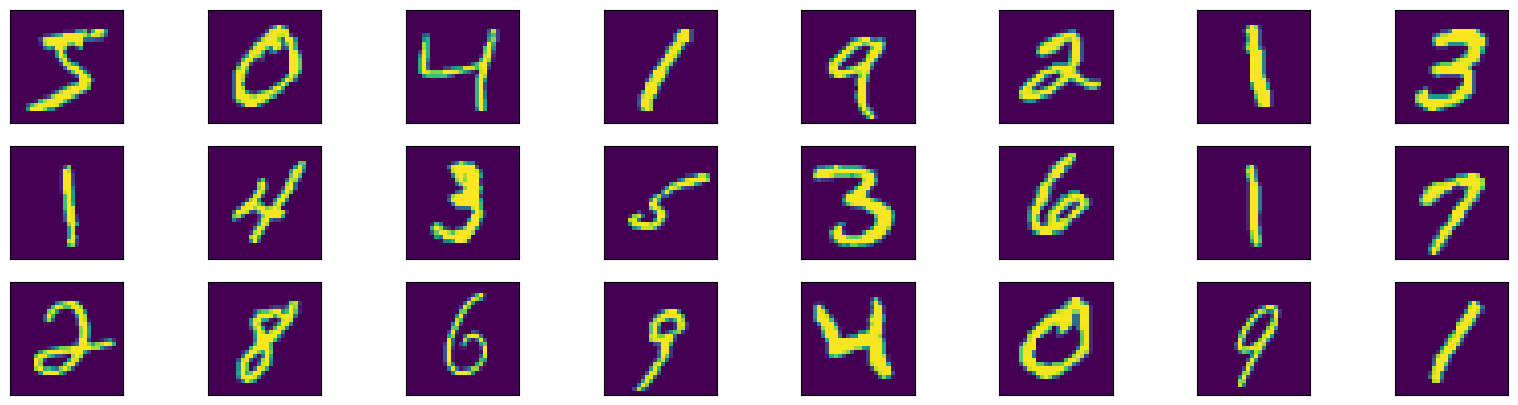

In [7]:
fig = plt.figure(figsize=(20,5))
for i in range(24):   #printing first 24 images
    ax = fig.add_subplot(3, 8, i + 1, xticks=[], yticks=[])  #adding a subplot of size 3 rows 8 columns
    ax.imshow(x_train[i]) #using imshow displaying all the image

## ***Data Pre-Processing***

In [8]:
x_train = x_train.astype('float32') / 255

In [9]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [10]:
x_test = x_test.astype('float32') / 255

In [11]:
x_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [12]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [13]:
x_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [14]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [15]:
x_test

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [16]:
y_train_cat = to_categorical(y_train, 10)

In [17]:
y_train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [18]:
y_test_cat = to_categorical(y_test, 10)


In [19]:
y_test_cat

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## ***Model Building***

In [20]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

c:\Python3.12.4\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

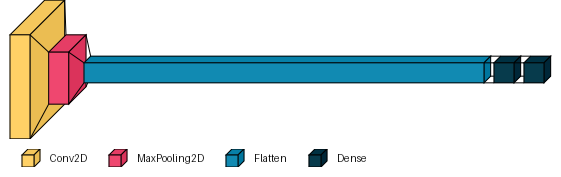

In [24]:
import visualkeras
visualkeras.layered_view(model, scale_xy=4, legend=True)

In [22]:
model.fit(x_train, y_train_cat, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8665 - loss: 0.4691 - val_accuracy: 0.9727 - val_loss: 0.0979
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9771 - loss: 0.0803 - val_accuracy: 0.9776 - val_loss: 0.0745
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9841 - loss: 0.0540 - val_accuracy: 0.9830 - val_loss: 0.0627
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9889 - loss: 0.0374 - val_accuracy: 0.9813 - val_loss: 0.0626
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9928 - loss: 0.0250 - val_accuracy: 0.9834 - val_loss: 0.0558


## Model Evaluation

In [25]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)
print(f'Test accuracy: {test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9834 - loss: 0.0550
Test accuracy: 0.9860000014305115


In [26]:
# save the model
model.save('my_model.keras')

## Result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
The model predicts this digit as: 5


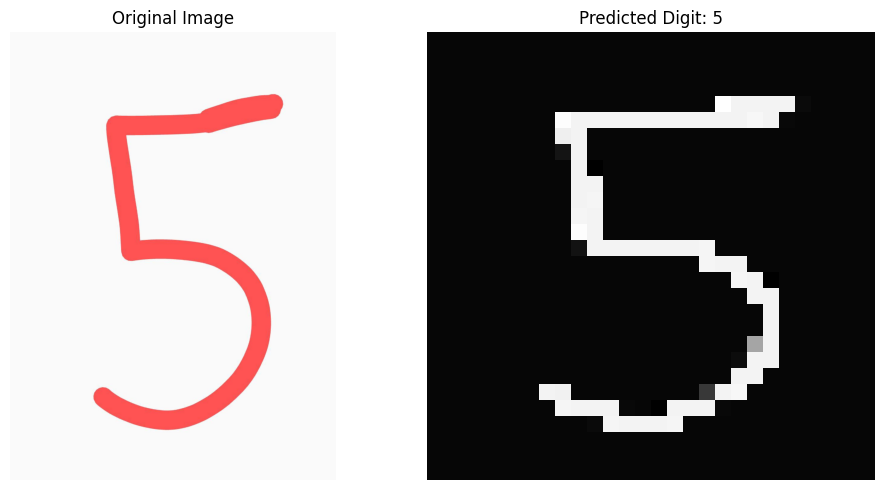

In [28]:
import tensorflow as tf
# Load the saved model
loaded_model = tf.keras.models.load_model('my_model.keras')

# Load the original handwritten image
image_path = 'handwritten5.jpg'  # Replace with your image file path
original_img = mpimg.imread(image_path)

# Preprocess the image
img = image.load_img(image_path, target_size=(28, 28), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = 255 - img_array  # Invert the colors if necessary
img_array = img_array / 255.0  # Normalize the image
img_array = img_array.reshape(1, 28, 28, 1)

# Predict the class
predicted_class = loaded_model.predict(img_array).argmax()
print(f'The model predicts this digit as: {predicted_class}')

# Plot the original and processed images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image
axes[0].imshow(original_img)
axes[0].axis('off')
axes[0].set_title('Original Image')

# Display the processed image with the prediction
axes[1].imshow(img_array[0].reshape(28, 28), cmap='gray')
axes[1].axis('off')
axes[1].set_title(f'Predicted Digit: {predicted_class}')

# Adjust layout to add some gap
plt.subplots_adjust(wspace=0.3)  # Adjust horizontal spacing
plt.tight_layout()

# Show the plot
plt.show()


#### Challenges Faced and Solutions

#### Image Preprocessing
- **Challenge**: The original handwritten image had different dimensions and color channels that were incompatible with the model input requirements.
- **Solution**: Resized the image to 28x28 pixels and converted it to grayscale using tensorflow.keras.preprocessing.image. Normalized the pixel values to a range of 0 to 1 for better model performance.

#### Model Prediction
- **Challenge**: The model occasionally misclassified images due to noise or unclear handwriting in the input.
- **Solution**: Applied image inversion and normalization to enhance contrast and remove unnecessary noise, ensuring better alignment with the training data distribution.

#### Visualization
- **Challenge**: Displaying the original and preprocessed images alongside the model's predictions for clear comparison and analysis.
- **Solution**: Used Matplotlib to plot the original image and preprocessed image side by side with appropriate titles and spacing, enabling easier interpretation of the results.
